<a href="https://colab.research.google.com/github/Sivasurya-J/DataScienceAcademicProjects/blob/main/MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2)

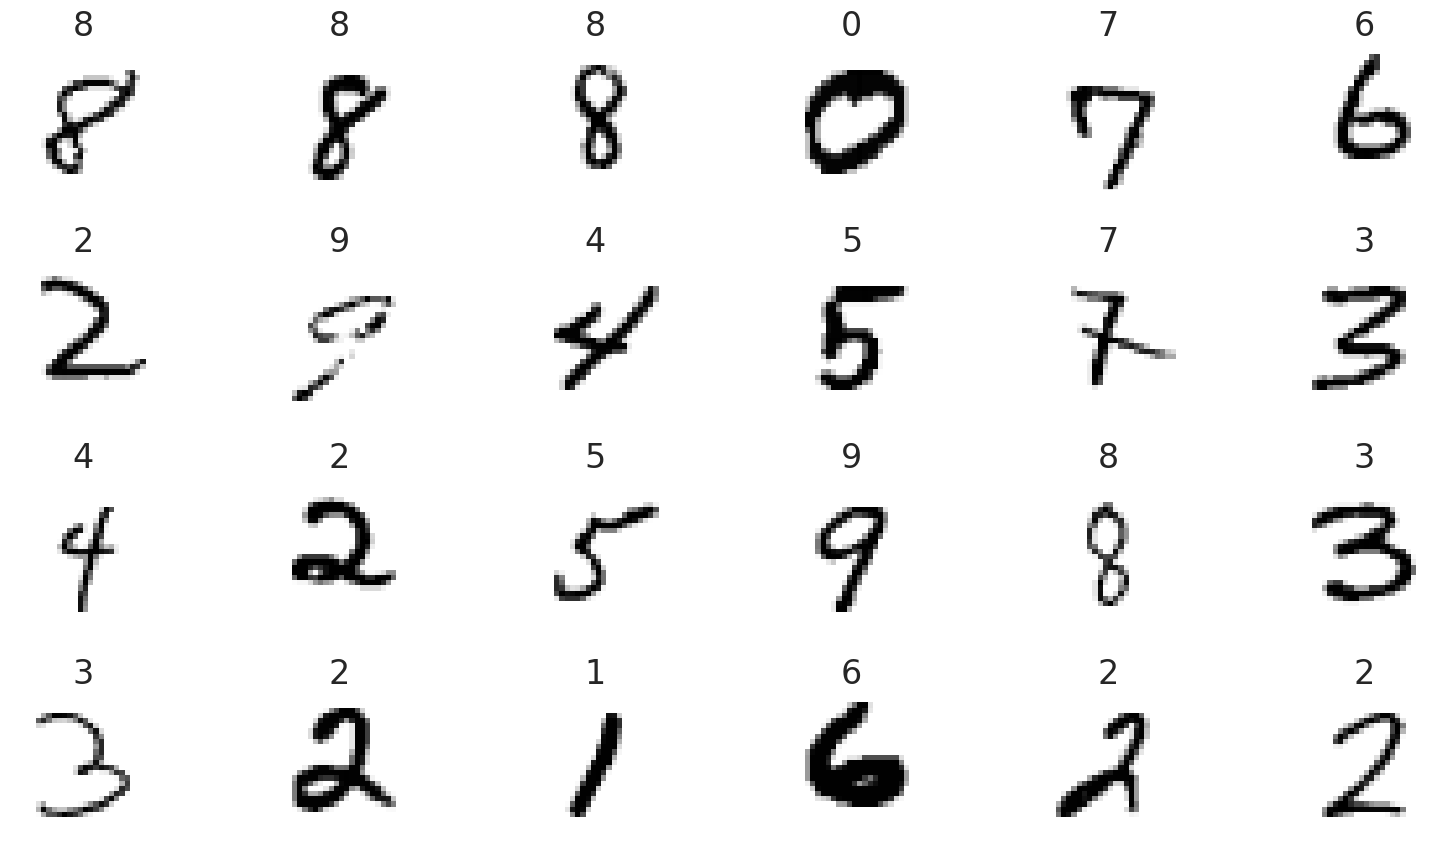

In [5]:
import numpy as np
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))

for item in zip(axes.ravel(), X_train[index], y_train[index]):
  axes, image, target = item
  axes.imshow(image, cmap=plt.cm.gray_r)
  axes.set_xticks([])
  axes.set_yticks([])
  axes.set_title(target)
plt.tight_layout()

***Data Preparation***

In [6]:
X_train = X_train.reshape((60000, 28, 28, 1))

In [7]:
X_train.shape

(60000, 28, 28, 1)

In [8]:
X_test = X_test.reshape(10000, 28, 28, 1)
X_test.shape

(10000, 28, 28, 1)

***Normalizing the Image Data***

In [9]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

***OneHot Encoding***

In [10]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_train.shape

(60000, 10)

In [11]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [12]:
y_test = to_categorical(y_test)
y_test.shape

(10000, 10)

***Creating the Neural Network***

In [13]:
from tensorflow.keras.models import Sequential
cnn = Sequential()

In [14]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

In [15]:
cnn.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Flatten())
cnn.add(Dense(units=128, activation='relu'))
cnn.add(Dense(units=10, activation='softmax'))

In [16]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 128)               4

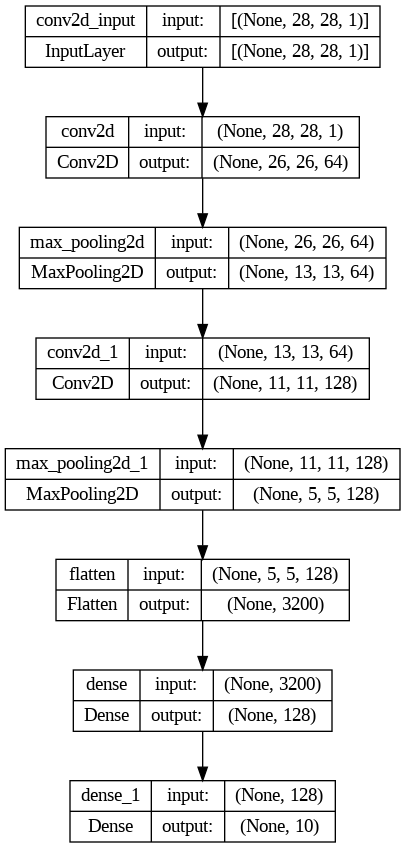

In [17]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(cnn, to_file='convnet.png', show_shapes=True, show_layer_names=True)
Image(filename='convnet.png')

In [18]:
# Compiling the Model
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 [==============================] - 146s 171ms/step - loss: 0.1395 - accuracy: 0.9576 - val_loss: 0.0435 - val_accuracy: 0.9872
Epoch 2/5
844/844 [==============================] - 134s 159ms/step - loss: 0.0434 - accuracy: 0.9869 - val_loss: 0.0390 - val_accuracy: 0.9890
Epoch 3/5
844/844 [==============================] - 132s 156ms/step - loss: 0.0297 - accuracy: 0.9912 - val_loss: 0.0322 - val_accuracy: 0.9900
Epoch 4/5
844/844 [==============================] - 131s 156ms/step - loss: 0.0222 - accuracy: 0.9926 - val_loss: 0.0288 - val_accuracy: 0.9922
Epoch 5/5
844/844 [==============================] - 132s 156ms/step - loss: 0.0163 - accuracy: 0.9947 - val_loss: 0.0308 - val_accuracy: 0.9912


In [20]:
# loss, accuracy = cnn.evaluate(X_test, y_test)
# loss, accuracy

In [21]:
predictions = cnn.predict(X_test)

313/313 [==============================] - 6s 19ms/step


In [22]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [23]:
for index, probability in enumerate(predictions[0]):
  print(f'{index}: {probability:.10%}')

0: 0.0000009094%
1: 0.0000000123%
2: 0.0000959792%
3: 0.0000177469%
4: 0.0000000008%
5: 0.0000011365%
6: 0.0000000000%
7: 99.9998390675%
8: 0.0000425940%
9: 0.0000057431%


In [24]:
images = X_test.reshape((10000, 28, 28))
incorrect_predictions = []

for i, (p,e) in enumerate(zip(predictions, y_test)):
  predicted, expected = np.argmax(p), np.argmax(e)

  if predicted != expected:
    incorrect_predictions.append((i, images[i], predicted, expected))

In [25]:
len(incorrect_predictions)

90

***Visualizing Incorrect Predictions***

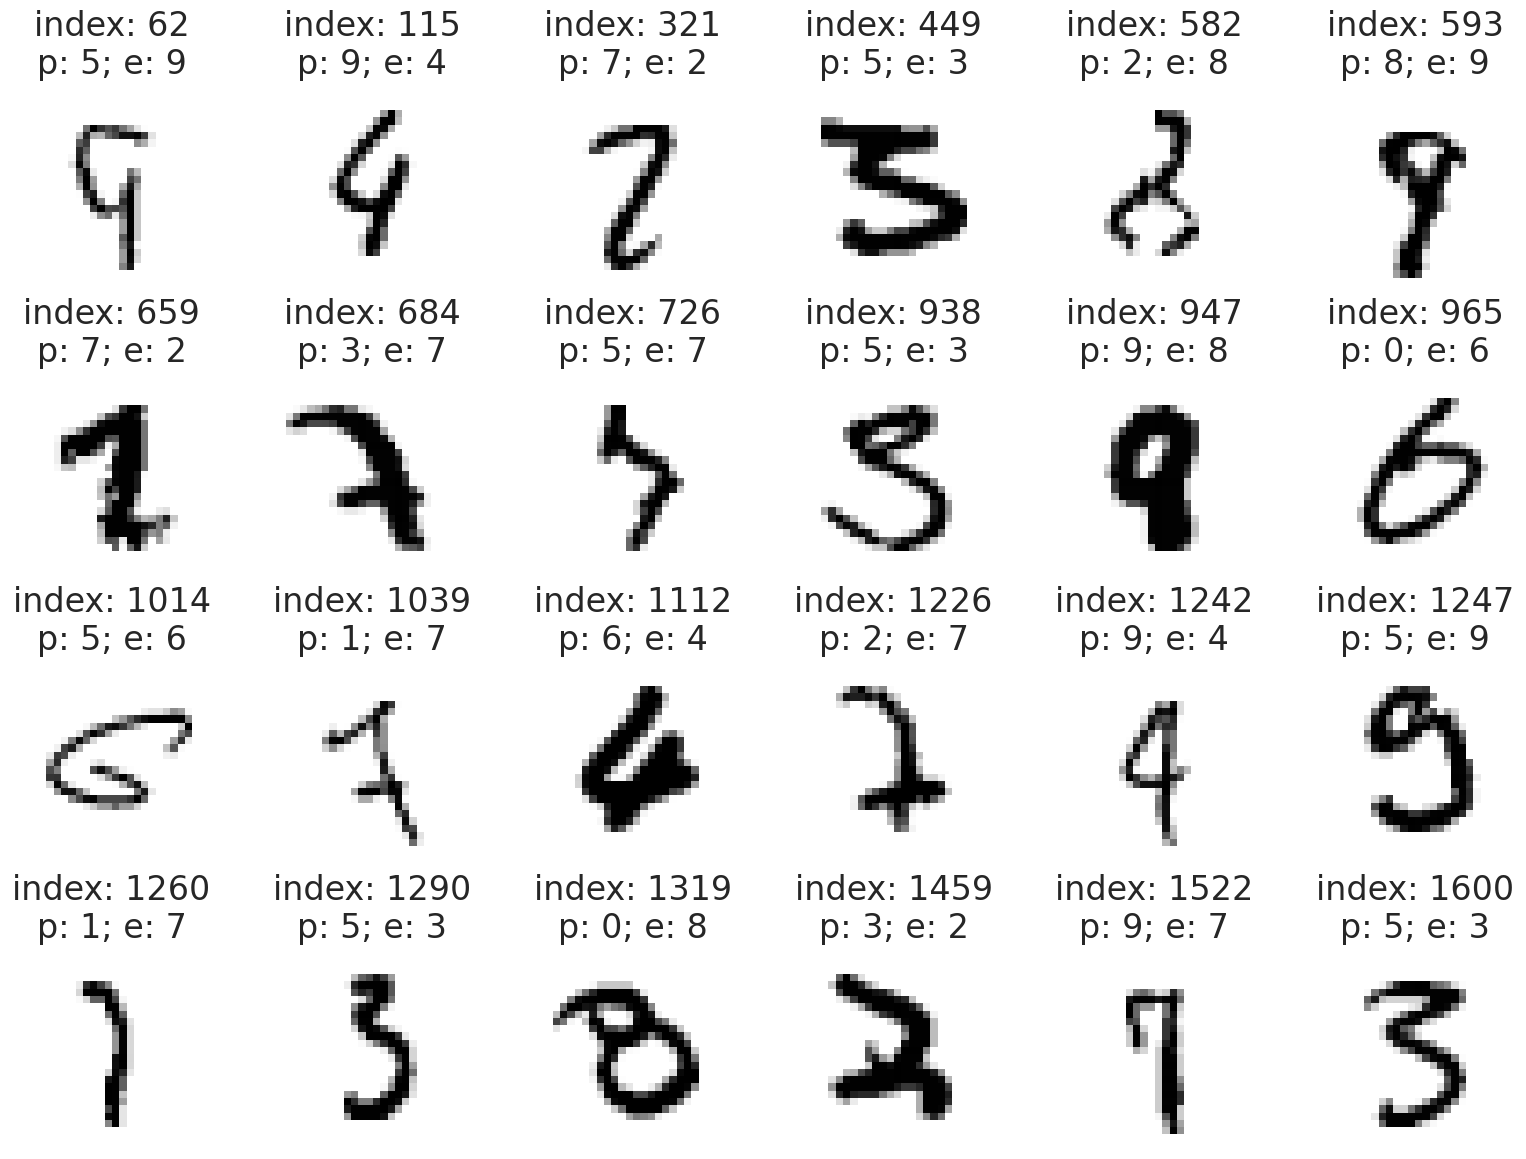

In [26]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))

for axes, item in zip(axes.ravel(), incorrect_predictions):
  index, image, predicted, expected = item
  axes.imshow(image, cmap=plt.cm.gray_r)
  axes.set_xticks([])
  axes.set_yticks([])
  axes.set_title(f'index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout()

In [27]:
def display_probabilities(prediction):
  for index, probability in enumerate(prediction):
    print(f'{index}: {probability:.10%}')

In [28]:
display_probabilities(predictions[495])

0: 3.6976706237%
1: 0.0000051779%
2: 1.5810089186%
3: 0.0575740472%
4: 0.0075197247%
5: 0.0010512944%
6: 2.7072120458%
7: 0.0000012555%
8: 91.9422507286%
9: 0.0056982608%


In [29]:
display_probabilities(predictions[583])

0: 0.0000006540%
1: 0.0001012535%
2: 88.6474251747%
3: 1.0251417756%
4: 0.0000106400%
5: 0.0000003813%
6: 0.0000000276%
7: 9.5317594707%
8: 0.7955592126%
9: 0.0000007996%


In [30]:
display_probabilities(predictions[625])

0: 0.0000031505%
1: 0.0002402375%
2: 0.0005450093%
3: 0.0000004463%
4: 3.7533074617%
5: 0.0000019415%
6: 96.2458491325%
7: 0.0000000010%
8: 0.0000219605%
9: 0.0000121138%


***Saving and Loading the Model***

In [31]:
cnn.save('mnist_cnn.h5')

In [32]:
from tensorflow.keras.models import load_model
cnn = load_model('mnist_cnn.h5')

In [33]:
from tensorflow.keras.callbacks import TensorBoard
import time

tensorboard_callback = TensorBoard(log_dir=f'./logs/mnist{time.time()}', histogram_freq=1, write_graph=True)

In [ ]:
cnn.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1, callbacks=[tensorboard_callback])

Epoch 1/10
200/844 [======>.......................] - ETA: 1:36 - loss: 0.0105 - accuracy: 0.9962